In [144]:
# https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/
# https://matplotlib.org/tutorials/intermediate/legend_guide.html#sphx-glr-tutorials-intermediate-legend-guide-py

In [45]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [84]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)

## Load data

In [47]:
BASE_FOLDER = Path('../data')
RANDOM_STATE = 42
NEG_RATE = 1

In [48]:
def get_csv(session, split):
    return 'zju_gaitaccel_session_' + str(session) + '_' + str(split) + '.csv'

In [49]:
df_s0_128 = pd.read_csv(BASE_FOLDER.joinpath(Path(get_csv(0, 128))), header=None)
df_s1_128 = pd.read_csv(BASE_FOLDER.joinpath(Path(get_csv(1, 128))), header=None)
df_s2_128 = pd.read_csv(BASE_FOLDER.joinpath(Path(get_csv(2, 128))), header=None)

In [50]:
select_classes = ['u%03d' % i for i in range(1, 11)]
df = df_s1_128.copy()
df = df.loc[df[df.columns[-1]].isin(select_classes)]
y = df[df.columns[-1]].values
y = LabelEncoder().fit_transform(y) + 1
X = df.drop([df.columns[-1]], axis=1)

In [51]:
X.shape, y.shape

((534, 59), (534,))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [53]:
select_classes = ['u%03d' % i for i in range(11, 154)]
df = df_s1_128.copy()
df = df.loc[df[df.columns[-1]].isin(select_classes)]
df = df.sample(n=X.shape[0] * NEG_RATE, random_state=RANDOM_STATE)
y_neg = np.zeros((X.shape[0] * NEG_RATE,))
X_neg = df.drop([df.columns[-1]], axis=1)

In [54]:
X_neg_train, X_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=0.2, random_state=RANDOM_STATE)

In [55]:
X_neg_train.shape, y_neg_train.shape

((427, 59), (427,))

In [56]:
X_full_train = np.concatenate((X_train, X_neg_train), axis=0)
y_full_train = np.concatenate((y_train, y_neg_train), axis=0).astype(int)
X_full_test = np.concatenate((X_test, X_neg_test), axis=0)
y_full_test = np.concatenate((y_test, y_neg_test), axis=0).astype(int)

In [57]:
label_df = pd.DataFrame(data=y_full_train)
print(label_df[0].value_counts())

0     427
8      53
4      51
7      48
9      47
6      44
3      44
10     37
5      37
2      34
1      32
Name: 0, dtype: int64


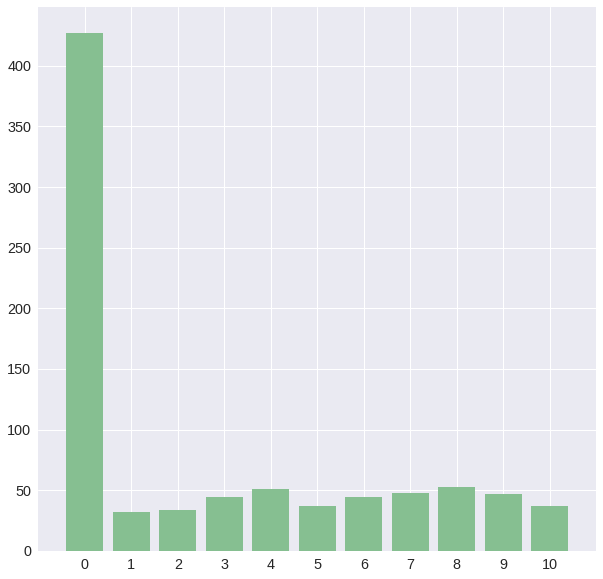

In [58]:
counts = np.bincount(y_full_train)
fig, ax = plt.subplots()
ax.bar(range(11), counts, width=0.8, align='center', color='#86bf91')
ax.set(xticks=range(11), xlim=[-1, 11])

plt.show()

In [59]:
from sklearn.svm import SVC

In [60]:
clf = SVC(gamma='auto', C=100)
clf.fit(X_full_train, y_full_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
clf.score(X_full_test, y_full_test)

0.822429906542056

In [62]:
label_df = pd.DataFrame(data=y_full_test)
print(label_df[0].value_counts())

0     107
2      18
10     12
1      12
7      11
4      11
8      10
3      10
5       9
9       7
6       7
Name: 0, dtype: int64


In [63]:
label_df = pd.DataFrame(data=clf.predict(X_full_test))
print(label_df[0].value_counts())

0     128
7      13
10     11
3      11
1      11
8       9
5       8
2       8
9       7
6       6
4       2
Name: 0, dtype: int64


## Binary classification

In [64]:
y_bin_train = y_full_train.copy()
y_bin_train[y_bin_train < 10] = 0
y_bin_train[y_bin_train == 10] = 1

In [65]:
y_bin_test = y_full_test.copy()
y_bin_test[y_bin_test < 10] = 0
y_bin_test[y_bin_test == 10] = 1

In [66]:
label_df = pd.DataFrame(data=y_bin_train)
print(label_df[0].value_counts())

0    817
1     37
Name: 0, dtype: int64


In [67]:
clf = SVC(gamma='auto', C=100)
clf.fit(X_full_train, y_bin_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
clf.score(X_full_test, y_bin_test)

0.9766355140186916

## Visualization

In [69]:
%load_ext wurlitzer

The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [70]:
from MulticoreTSNE import MulticoreTSNE as TSNE
X_2d = TSNE(n_jobs=8, random_state=RANDOM_STATE, verbose=2).fit_transform(X_full_train)

Performing t-SNE using 8 cores.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 86 of 854
 - point 170 of 854
 - point 255 of 854
 - point 340 of 854
 - point 425 of 854
 - point 510 of 854
 - point 595 of 854
 - point 680 of 854
 - point 765 of 854
 - point 850 of 854
Done in 0.00 seconds (sparsity = 0.140778)!
Learning embedding...
Iteration 51: error is 64.783107 (50 iterations in 0.00 seconds)
Iteration 101: error is 64.461387 (50 iterations in 0.00 seconds)
Iteration 151: error is 64.461453 (50 iterations in 1.00 seconds)
Iteration 201: error is 64.418358 (50 iterations in 0.00 seconds)
Iteration 251: error is 64.441188 (50 iterations in 0.00 seconds)
Iteration 301: error is 1.022281 (50 iterations in 0.00 seconds)
Iteration 351: error is 0.902380 (50 iterations in 0.00 seconds)
Iteration 401: error is 0.878494 (50 iterations in 0.00 seconds)
Iteration 451: error is 0.868704 (50 iterations in 1.00 seconds)
I

In [71]:
y = y_full_train.copy()

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.markers as markers

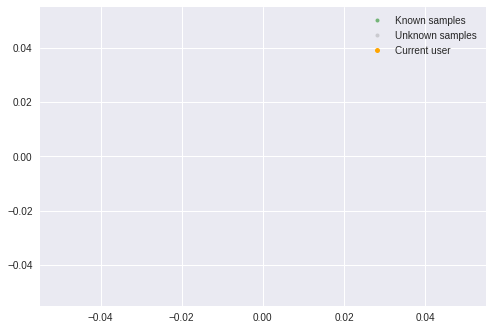

In [139]:
known, =   plt.plot([], [], linestyle='', marker='o', markersize=4, color='green', alpha=0.5)
unknown, = plt.plot([], [], linestyle='', marker='o', markersize=4, color="grey", alpha=0.3)
curr, =    plt.plot([], [], linestyle='', marker='o', markersize=5, color="orange")
plt.legend((known, unknown, curr), ('Known samples', 'Unknown samples', 'Current user'))

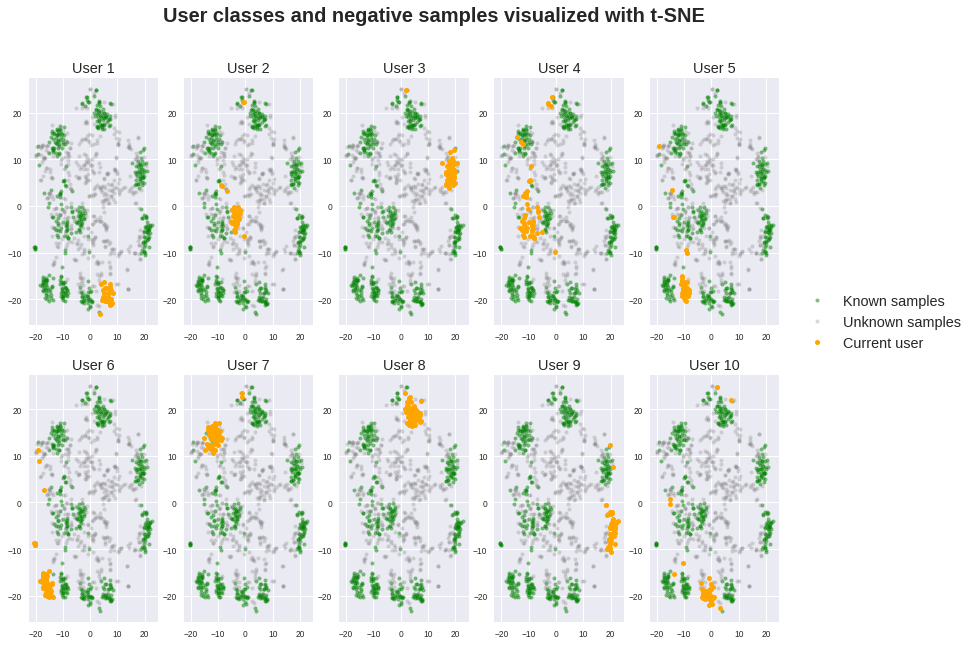

In [225]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'small',
          'ytick.labelsize': 'small'}
pylab.rcParams.update(params)

data = np.concatenate((X_2d, y.reshape(y.shape[0], 1)), axis=1)
viz_df = pd.DataFrame(data=data, columns=['x0', 'x1', 'class'])

known_classes = np.unique(y)
known_classes = known_classes[known_classes > 0]

fig, axes = plt.subplots(nrows=2, ncols=5)
fig.suptitle('User classes and negative samples visualized with t-SNE', fontsize=20, fontweight='bold')

for i in known_classes:
    neg_df = viz_df[viz_df['class'] == 0]
    pos_df = viz_df[(viz_df['class'] != 0) & (viz_df['class'] != i)]
    curr_df = viz_df[viz_df['class'] == i]
    label = 'User {}'.format(i)

    ax = axes[int((i-1) / 5), (i-1) % 5]
    ax.plot('x0', 'x1', data=pos_df, linestyle='', marker='o', markersize=4, color="green", alpha=0.5)
    ax.plot('x0', 'x1', data=neg_df, linestyle='', marker='o', markersize=4, color="grey", alpha=0.3)
    ax.plot('x0', 'x1', data=curr_df, linestyle='', marker='o', markersize=5, color="orange")
    ax.set_title(label)

known,   = plt.plot([], [], linestyle='', marker='o', markersize=4, color='green', alpha=0.5)
unknown, = plt.plot([], [], linestyle='', marker='o', markersize=4, color="grey", alpha=0.3)
curr,    = plt.plot([], [], linestyle='', marker='o', markersize=5, color="orange")
plt.subplots_adjust(right=0.82)
fig.legend((known, unknown, curr), ('Known samples', 'Unknown samples', 'Current user'), loc='center right', fancybox=True)

plt.savefig('./users.svg', format='svg')

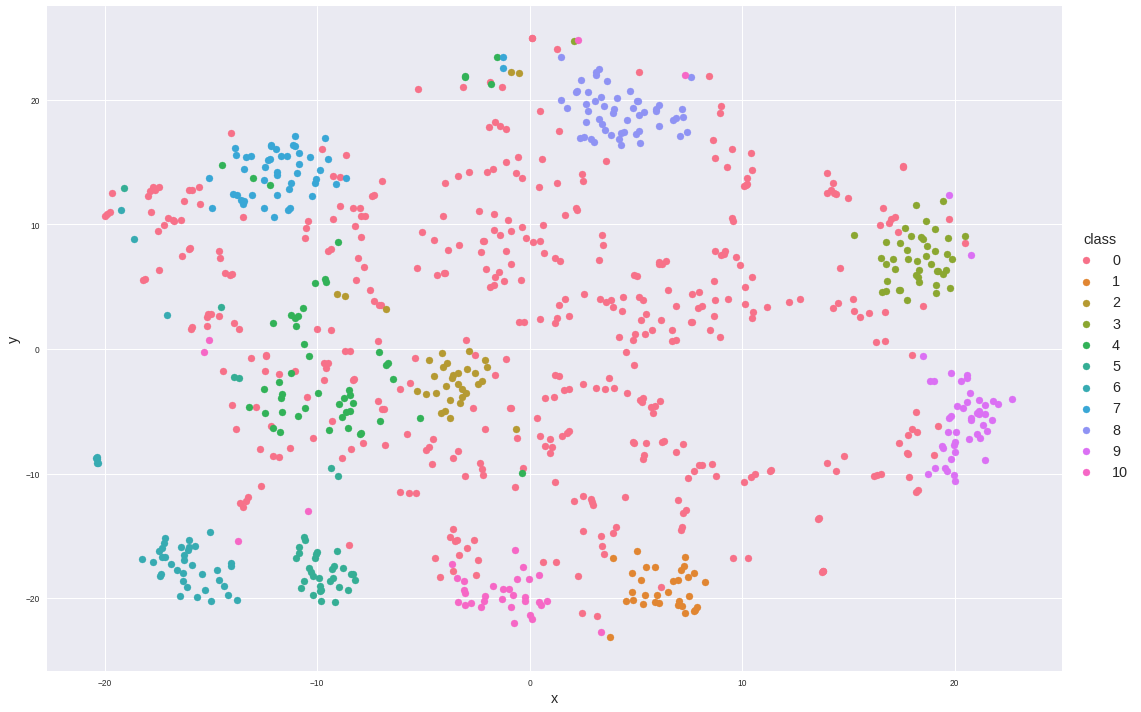

In [230]:
data = np.concatenate((X_2d, y.reshape(y.shape[0], 1)), axis=1)
viz_df = pd.DataFrame(data=data, columns=['x', 'y', 'class'])

fg = sns.FacetGrid(data=viz_df, hue='class', hue_order=np.unique(y), aspect=1.5, height=10)
fg.map(plt.scatter, 'x', 'y').add_legend()
# plt.subplots_adjust(top=0.9)
# fg.fig.suptitle('User classes and negative samples visualized with t-SNE')

In [ ]:
data = np.concatenate((X_2d, y.reshape(y.shape[0], 1)), axis=1)
viz_df = pd.DataFrame(data=data, columns=['x', 'y', 'class'])

fg = sns.FacetGrid(data=viz_df, hue='class', hue_order=np.unique(y), aspect=1.5, height=10)
fg.map(plt.scatter, 'x', 'y').add_legend()